## 딥러닝응용 1주차 과제
### ML Regression

In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load Data
df = pd.read_csv('abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


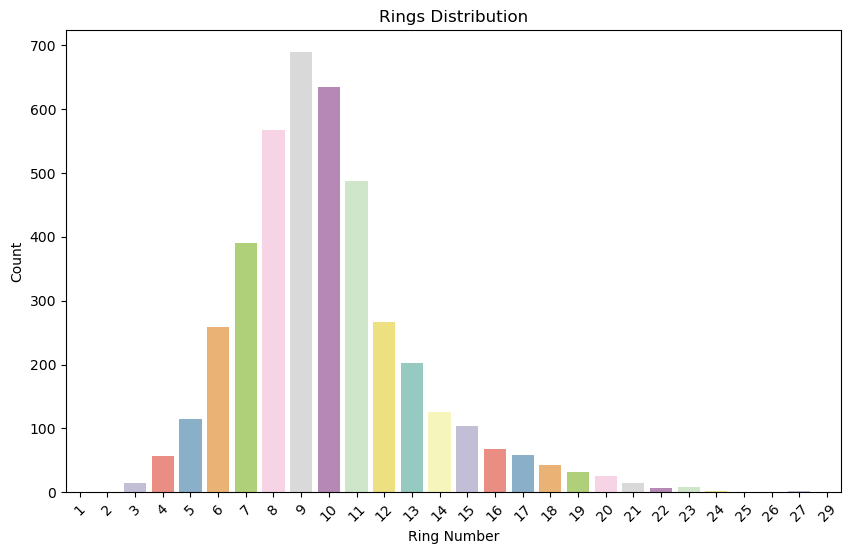

In [12]:
# Visualize Rings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rings', hue='Rings', palette='Set3', legend=False)
plt.title('Rings Distribution')
plt.xlabel('Ring Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Data Preproccesing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df = df.drop(['id'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
df.shape

(4177, 9)

In [15]:
# Create Target
x = df.drop(['Rings'], axis=1)
y = df['Rings']

In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [17]:
# LR Train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# LR Test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 4.2755
Mean Absolute Error (MAE): 1.5159
R² Score: 0.5427


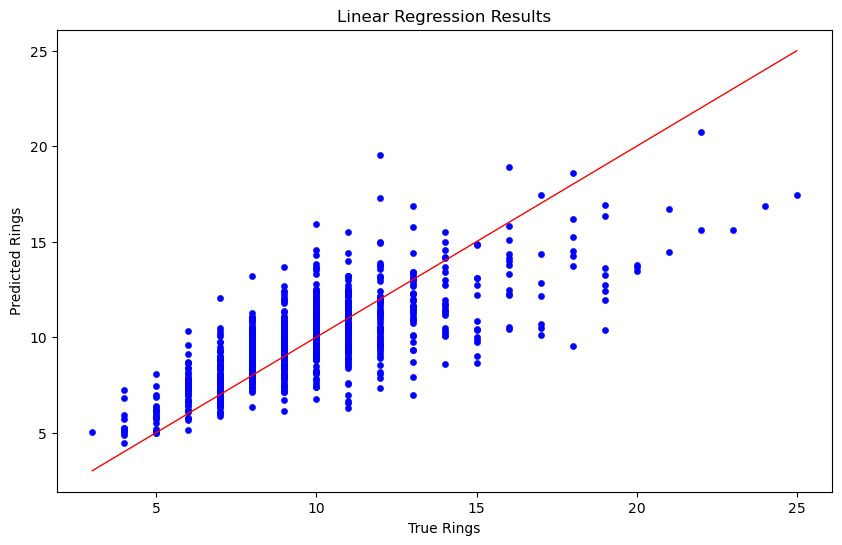

In [19]:
# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor=None, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1) 
plt.xlabel('True Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression Results')
plt.show()
